In [1]:
import pandas as pd
from ClassificationNLP import Classification_NLP
pd.set_option('display.max_columns', None)
import sentence_to_feature as stfu
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
directory = "../data/all_feature_sets/"
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))
            
            
scores = pd.DataFrame(columns = ['dataset', 'score', 'type'])

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Classification_NLP(datasets['data'][i], datasets['doc'][i], .8  )
    _, row['score']  = nlp.accuracy()
    row['type'] = 'Classification'
    i+=1
    scores = scores.append(row, ignore_index = True)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [2]:
from ClusteringNLP import Clustering_NLP
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    nlp = Clustering_NLP(datasets['data'][i], datasets['doc'][i])
    nlp.correct_cluster_labels()
    row['score'] = nlp.accuracy()
    i+=1
    row['type'] = 'Clustering'
    scores = scores.append(row, ignore_index = True)

In [3]:
from AutomatedSARGrading import Automated_SAR_Grading
datasets = {'name': [], 'data': [], 'doc': []}
for filename in os.listdir(directory):
    if filename[-4:] == '.csv':
        if filename[-8:-5] == 'dat':
            datasets['data'].append(pd.read_csv(directory + filename))
            datasets['name'].append(filename[:-8])
        else:
            datasets['doc'].append(pd.read_csv(directory + filename))

i = 0
row = {}
for name in datasets['name']:
    row['dataset'] = name
    answer_row = len(datasets['data'][i]) -1
    sar = Automated_SAR_Grading(datasets['data'][i], datasets['doc'][i], answer_row)
    row['score'] = sar.run()
    i+=1
    row['type'] = 'Automated'
    scores = scores.append(row, ignore_index = True)

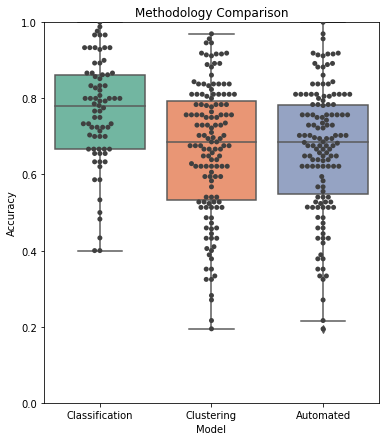

In [4]:
plt.figure(figsize = (6,7))
sns.boxplot(
    data = scores,
    x = 'type',
    y = 'score',
    palette = 'Set2'
)
sns.swarmplot(
    data = scores,
    x = 'type',
    y = 'score',
    color = "0.25"
)
plt.ylim(0,1)
plt.title("Methodology Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [31]:
scores.to_csv(
    'comparisons.csv',
    index = False
)

In [44]:
len(scores) / 2


84.0

In [4]:
datasets

{'name': ['question0',
  'question100',
  'question101',
  'question104',
  'question105',
  'question107',
  'question108',
  'question10',
  'question111',
  'question112',
  'question118',
  'question119',
  'question11',
  'question120',
  'question122',
  'question123',
  'question126',
  'question127',
  'question128',
  'question12',
  'question130',
  'question131',
  'question132',
  'question133',
  'question134',
  'question13',
  'question14',
  'question17',
  'question18',
  'question19',
  'question21',
  'question23',
  'question25',
  'question26',
  'question27',
  'question30',
  'question31',
  'question32',
  'question33',
  'question38',
  'question39',
  'question3',
  'question41',
  'question42',
  'question44',
  'question45',
  'question49',
  'question4',
  'question50',
  'question51',
  'question53',
  'question54',
  'question56',
  'question58',
  'question60',
  'question61',
  'question64',
  'question65',
  'question66',
  'question67',
  'question69'

In [5]:
datasets.keys()

dict_keys(['name', 'data', 'doc'])